# Diabetes Prediction with Pima Diabetes Dataset using Decision Tree and Neural Network (From Abdul-Qadir)

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# Random Seed for Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
# Loading Data
df = pd.read_csv('pima_diabetes_data.csv')
print('Dataset shape:', df.shape)
print(df.describe())

Dataset shape: (768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.

In [5]:
# Preprocessing (replace 0 with NaN, fill with mean)
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)


In [6]:
# Features/target, train/test split, scaling
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Decicion Tree


Decision Tree Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       100
           1       0.70      0.69      0.69        54

    accuracy                           0.79       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.79      0.79       154



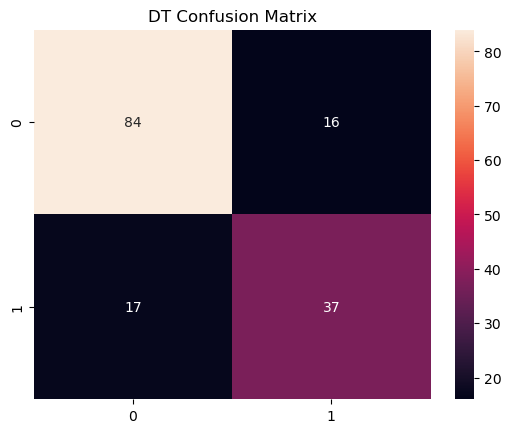

In [7]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('\nDecision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True); 
plt.title('DT Confusion Matrix'); 
plt.show()

## Neural Network


Neural Network Accuracy: 0.7337662577629089
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step 
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       100
           1       0.63      0.59      0.61        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



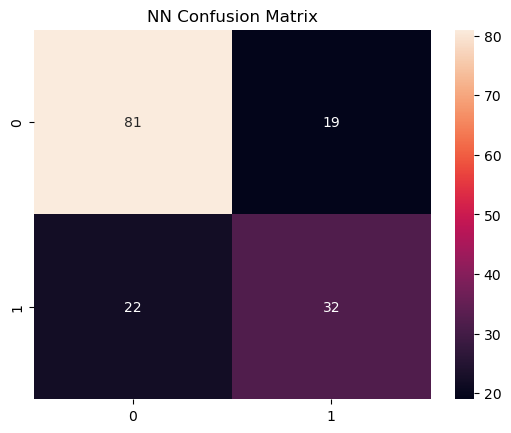

In [10]:
# Neural Network
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)
loss, acc = model.evaluate(X_test, y_test, verbose=0)
                          
print('\nNeural Network Accuracy:', acc)
                           
y_pred_dl = (model.predict(X_test) > 0.5).astype("int32").flatten()

print(classification_report(y_test, y_pred_dl))

sns.heatmap(confusion_matrix(y_test, y_pred_dl), annot=True); 
plt.title('NN Confusion Matrix'); 
plt.show()